In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/Users/rahulkhandelwal/Desktop/Purdue Academics/Mod 1/MGMT 670 Business Analytics/Movies2016.xlsx')

In [4]:
df.head()

,Movie Title,Opening Gross Sales ($ millions),Total Gross Sales ($ millions),Number of Theaters,Weeks in Release
0,Rogue One: A Star Wars Story,155.08,532.18,4157,20
1,Finding Dory,135.06,486.30,4305,25
2,Captain America: Civil War,179.14,408.08,4226,20
3,The Secret Life of Pets,104.35,368.38,4381,25
4,The Jungle Book (2016),103.26,364.00,4144,24


In [5]:
df.columns

Index(['Movie Title', 'Opening Gross Sales ($ millions)',
       'Total Gross Sales ($ millions)', 'Number of Theaters',
       'Weeks in Release'],
      dtype='object')

In [68]:
df.dtypes

Movie Title                          object
Opening Gross Sales ($ millions)    float64
Total Gross Sales ($ millions)      float64
Number of Theaters                    int64
Weeks in Release                      int64
dtype: object

In [69]:
descriptive = ['Opening Gross Sales ($ millions)',
       'Total Gross Sales ($ millions)', 'Number of Theaters',
       'Weeks in Release']

Correlation plots of Total Gross Sales with other columns

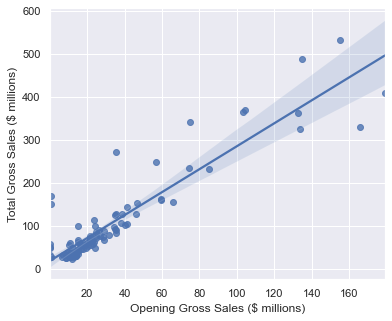

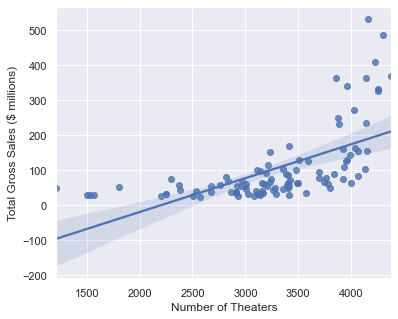

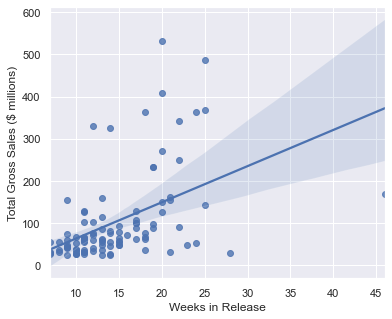

In [70]:
for col in ['Opening Gross Sales ($ millions)', 'Number of Theaters','Weeks in Release']:
    sns.regplot(data=df, x=col, y="Total Gross Sales ($ millions)")
    plt.show()

# High Performance Movies

In [48]:
q3, q1 = np.percentile(df['Total Gross Sales ($ millions)'], [75 ,25])
iqr = q3 - q1

In [49]:
t = q3+1.5*iqr

In [50]:
t

211.195

In [51]:
outliers = df.loc[df['Total Gross Sales ($ millions)']>t,:]

In [52]:
outliers.shape

(13, 5)

In [56]:
outliers

,Movie Title,Opening Gross Sales ($ millions),Total Gross Sales ($ millions),Number of Theaters,Weeks in Release
0,Rogue One: A Star Wars Story,155.08,532.18,4157,20
1,Finding Dory,135.06,486.30,4305,25
2,Captain America: Civil War,179.14,408.08,4226,20
3,The Secret Life of Pets,104.35,368.38,4381,25
4,The Jungle Book (2016),103.26,364.00,4144,24
5,Deadpool,132.43,363.07,3856,18
6,Zootopia,75.06,341.27,3959,22
7,Batman v Superman: Dawn of Justice,166.01,330.36,4256,12
8,Suicide Squad,133.68,325.10,4255,14
9,Sing,35.26,270.40,4029,20


% Contribution of outliers to total gross sales

In [63]:
np.round((outliers['Total Gross Sales ($ millions)'].sum()/df['Total Gross Sales ($ millions)'].sum())*100,2)

43.39

% Contribution of outliers to opening gross sales

In [62]:
np.round((outliers['Opening Gross Sales ($ millions)'].sum()/df['Opening Gross Sales ($ millions)'].sum())*100,2)

44.74

In [53]:
outliers.describe()

,Opening Gross Sales ($ millions),Total Gross Sales ($ millions),Number of Theaters,Weeks in Release
count,13.000000,13.000000,13.000000,13.000000
mean,110.416923,346.506154,4113.000000,20.000000
std,44.027642,91.548816,176.246513,3.872983
min,35.260000,232.640000,3856.000000,12.000000
25%,75.060000,270.400000,3959.000000,19.000000
50%,104.350000,341.270000,4144.000000,20.000000
75%,135.060000,368.380000,4255.000000,22.000000
max,179.140000,532.180000,4381.000000,25.000000


Removing outliers from the data and getting new characteristics

In [72]:
outlier_movies = outliers['Movie Title']

In [78]:
excluded_df = df.loc[~df['Movie Title'].isin(outlier_movies),:]

In [80]:
excluded_df.reset_index(inplace=True, drop=True)

In [81]:
excluded_df

,Movie Title,Opening Gross Sales ($ millions),Total Gross Sales ($ millions),Number of Theaters,Weeks in Release
0,Hidden Figures,0.52,169.61,3416,46
1,Jason Bourne,59.22,162.43,4039,21
2,Star Trek Beyond,59.25,158.85,3928,13
3,X-Men: Apocalypse,65.77,155.44,4153,9
4,Trolls,46.58,153.71,4066,21
...,...,...,...,...,...
82,The Forest,12.74,26.59,2509,10
83,Ben-Hur (2016),11.20,26.41,3084,7
84,The Witch,8.80,25.14,2204,14
85,Bridget Jones's Baby,8.57,24.25,2930,13


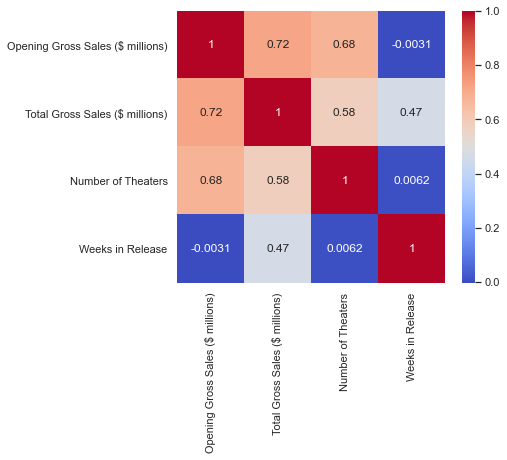

In [82]:
# Visualizing the correlation matrix for data without outliers
corrMatrix = excluded_df.loc[:,descriptive].corr()

sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(corrMatrix, cmap = 'coolwarm', annot = True)
plt.show()

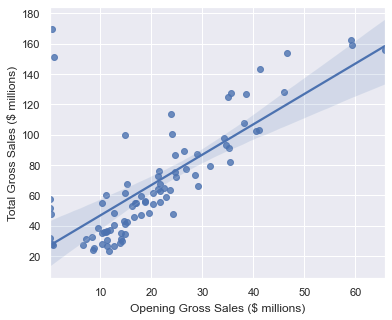

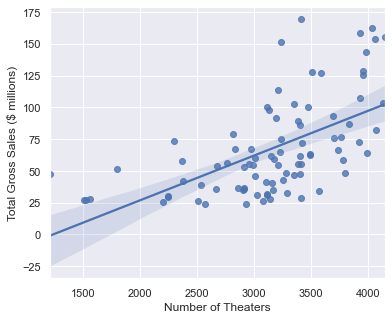

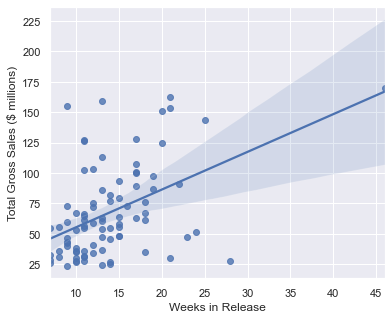

In [83]:
for col in ['Opening Gross Sales ($ millions)', 'Number of Theaters','Weeks in Release']:
    sns.regplot(data=excluded_df, x=col, y="Total Gross Sales ($ millions)")
    plt.show()

# Descriptive Statistics

In [54]:
df[descriptive].describe()

,Opening Gross Sales ($ millions),Total Gross Sales ($ millions),Number of Theaters,Weeks in Release
count,100.000000,100.00000,100.000000,100.000000
mean,32.085000,103.81900,3282.360000,14.730000
std,36.348432,105.53819,668.290167,5.818561
min,0.120000,23.59000,1213.000000,7.000000
25%,12.407500,40.78250,2954.000000,11.000000
50%,20.775000,62.98500,3285.000000,13.000000
75%,35.245000,108.94750,3840.250000,18.000000
max,179.140000,532.18000,4381.000000,46.000000


In [67]:
df.loc[df['Weeks in Release']==46,:]

,Movie Title,Opening Gross Sales ($ millions),Total Gross Sales ($ millions),Number of Theaters,Weeks in Release
13,Hidden Figures,0.52,169.61,3416,46


In [65]:
descriptive

['Movie Title',
 'Opening Gross Sales ($ millions)',
 'Total Gross Sales ($ millions)',
 'Number of Theaters',
 'Weeks in Release']

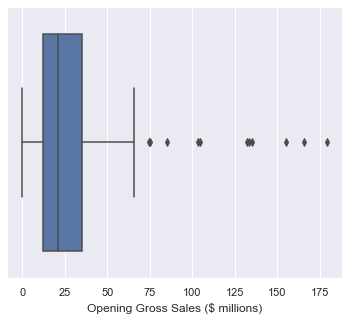

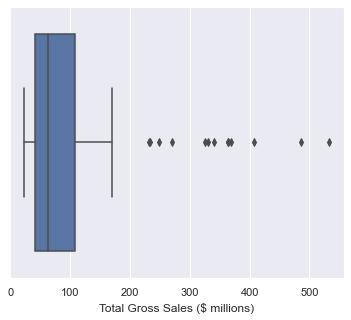

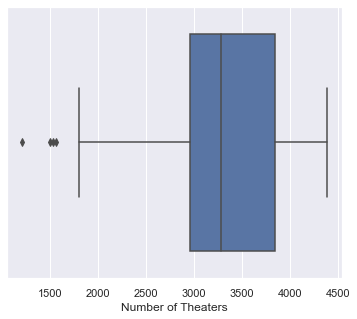

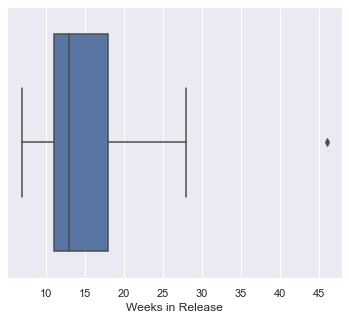

In [71]:
for col in descriptive:
    sns.boxplot(x=df[col])
    plt.show()

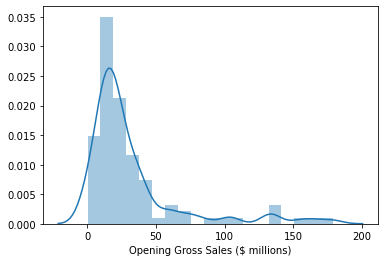

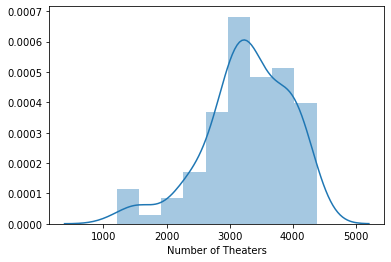

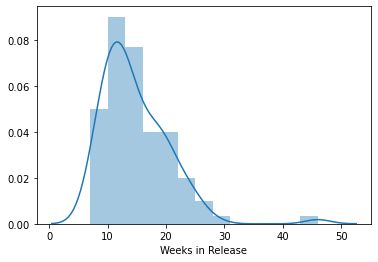

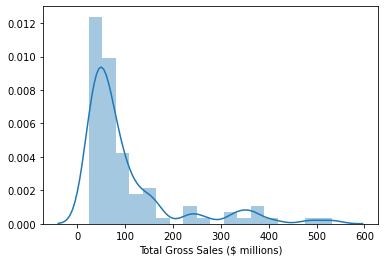

In [38]:
for col in descriptive:
    sns.distplot(df[col])
    plt.show()

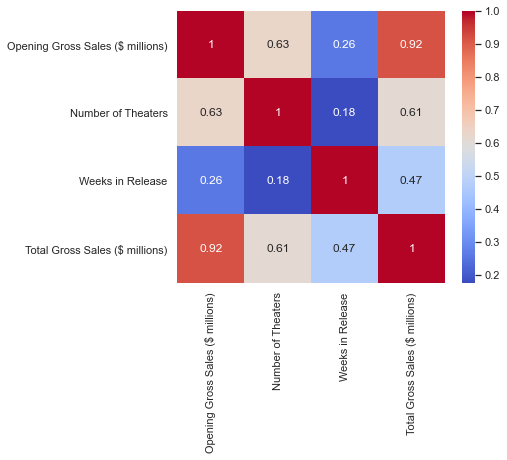

In [40]:
# Visualizing the correlation matrix for entire data
corrMatrix = df.loc[:,descriptive].corr()

sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(corrMatrix, cmap = 'coolwarm', annot = True)
plt.show()